In [ ]:
!pip install mediapipe

In [ ]:
!pip install mediapipe opencv-python tensorflow speechrecognition pyttsx3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 40.6 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.23.5
!pip install --upgrade --force-reinstall mediapipe

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 52.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.6 which is incompatible.
albumentatio

  Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached protobuf-4.25.6-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached sounddevice-0.5.1-py3-none-any.whl.metadata (1.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 8.6 MB/s eta 0:00:00
Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl (35.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.6 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached protobuf-4.25.6-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
Using cached sounddevice-0.5.1-py3-none-any.whl (32 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install --upgrade --force-reinstall tensorflow

  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
  Using cached ml_dtypes-0.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (21 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
Using cached absl_py-2.2.2-py3-none-any.whl (135 kB)
Using cached flatbuffers-25.2.10-py2.py3-none-any.whl (30 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving yoga-poses-dataset.zip to yoga-poses-dataset.zip


In [ ]:
import zipfile
import os
zip_path = "yoga-poses-dataset.zip"
extract_path = "yoga_dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print(" Dataset extracted.")

 Dataset extracted.


In [ ]:
import cv2
import mediapipe as mp
import os
import pandas as pd
from tqdm import tqdm

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)

# Dataset Path and Output
dataset_path = "yoga_dataset/DATASET"
output_csv = "yoga_keypoints.csv"

# Classes to process
valid_poses = ['tree', 'downdog', 'goddess', 'plank', 'warrior2']

keypoints_data = []

# Loop through TRAIN and TEST folders
for split in ['TRAIN', 'TEST']:
    split_path = os.path.join(dataset_path, split)

    for pose_class in os.listdir(split_path):
        if pose_class not in valid_poses:
            continue  # Skip irrelevant classes

        class_path = os.path.join(split_path, pose_class)
        if not os.path.isdir(class_path):
            continue

        print(f"Processing pose class: {pose_class} ({split})")

        for img_name in tqdm(os.listdir(class_path), desc=f"{pose_class}"):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                print(f"Failed to load: {img_path}")
                continue

            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            results = pose.process(img_rgb)

            if results.pose_landmarks:
                keypoints = []
                for lm in results.pose_landmarks.landmark[:33]:  # Only first 33 landmarks
                    keypoints.extend([lm.x, lm.y, lm.z])
                keypoints.append(pose_class)
                keypoints_data.append(keypoints)
            else:
                print(f"No pose detected in: {img_name}")

# Save to CSV
if keypoints_data:
    columns = [f"{dim}{i}" for i in range(33) for dim in ['x', 'y', 'z']] + ['label']
    df = pd.DataFrame(keypoints_data, columns=columns)
    df.to_csv(output_csv, index=False)
    print(f"Saved {len(df)} keypoint records to {output_csv}")
else:
    print("No keypoints extracted. Check image clarity and format.")


Processing pose class: warrior2 (TRAIN)


warrior2:  15%|█▍        | 37/252 [00:01<00:10, 20.40it/s]

No pose detected in: 00000326.jpg


warrior2:  56%|█████▌    | 141/252 [00:07<00:04, 23.22it/s]

No pose detected in: 00000182.jpg


warrior2:  73%|███████▎  | 183/252 [00:10<00:03, 18.76it/s]

No pose detected in: 00000137.jpg


warrior2: 100%|██████████| 252/252 [00:13<00:00, 18.19it/s]


Processing pose class: goddess (TRAIN)


goddess:   4%|▍         | 7/180 [00:00<00:09, 17.81it/s]

No pose detected in: 00000110.jpg


goddess:  11%|█         | 19/180 [00:01<00:07, 21.14it/s]

No pose detected in: 00000204.jpg
No pose detected in: 00000149.jpg


goddess:  22%|██▏       | 40/180 [00:01<00:06, 21.63it/s]

No pose detected in: 00000165.jpg


goddess:  28%|██▊       | 50/180 [00:02<00:05, 25.03it/s]

No pose detected in: 00000282.png
No pose detected in: 00000146.jpg


goddess:  55%|█████▌    | 99/180 [00:04<00:03, 23.99it/s]

No pose detected in: 00000272.png


goddess:  77%|███████▋  | 138/180 [00:06<00:01, 23.70it/s]

No pose detected in: 00000299.jpg


goddess: 100%|██████████| 180/180 [00:09<00:00, 18.85it/s]


Processing pose class: tree (TRAIN)


tree:  62%|██████▏   | 99/160 [00:04<00:02, 22.69it/s]

No pose detected in: 00000202.jpg


tree: 100%|██████████| 160/160 [00:08<00:00, 17.98it/s]


Processing pose class: plank (TRAIN)


plank:   4%|▍         | 11/266 [00:00<00:11, 22.41it/s]

No pose detected in: 00000378.jpg


plank:  52%|█████▏    | 137/266 [00:07<00:05, 23.33it/s]

No pose detected in: 00000285.jpg


plank:  97%|█████████▋| 259/266 [00:13<00:00, 22.93it/s]

No pose detected in: 00000236.png


plank: 100%|██████████| 266/266 [00:13<00:00, 19.72it/s]


Processing pose class: downdog (TRAIN)


downdog:   6%|▌         | 13/223 [00:00<00:13, 15.15it/s]

No pose detected in: 00000212.png
No pose detected in: 00000188.png


downdog:   9%|▉         | 21/223 [00:01<00:12, 15.58it/s]

No pose detected in: 00000270.jpg


downdog:  16%|█▌        | 36/223 [00:02<00:08, 21.37it/s]

No pose detected in: 00000387.jpg
No pose detected in: 00000281.jpg


downdog:  24%|██▍       | 54/223 [00:03<00:07, 22.54it/s]

No pose detected in: 00000173.jpg


downdog:  27%|██▋       | 60/223 [00:03<00:06, 23.93it/s]

No pose detected in: 00000350.jpg


downdog:  31%|███       | 69/223 [00:03<00:07, 20.36it/s]

No pose detected in: 00000340.jpg


downdog:  40%|████      | 90/223 [00:04<00:05, 22.81it/s]

No pose detected in: 00000232.jpg


downdog:  44%|████▍     | 99/223 [00:05<00:05, 21.78it/s]

No pose detected in: 00000304.jpg
No pose detected in: 00000320.jpg


downdog:  48%|████▊     | 108/223 [00:05<00:05, 22.21it/s]

No pose detected in: 00000315.jpg


downdog:  50%|█████     | 112/223 [00:05<00:04, 25.01it/s]

No pose detected in: 00000367.png
No pose detected in: 00000322.jpg


downdog:  57%|█████▋    | 127/223 [00:06<00:03, 24.23it/s]

No pose detected in: 00000381.jpg


downdog:  64%|██████▍   | 143/223 [00:07<00:04, 19.56it/s]

No pose detected in: 00000221.jpg


downdog:  74%|███████▎  | 164/223 [00:08<00:02, 23.53it/s]

No pose detected in: 00000300.jpg


downdog:  81%|████████  | 180/223 [00:08<00:01, 24.87it/s]

No pose detected in: 00000239.jpg
No pose detected in: 00000168.jpg


downdog:  86%|████████▌ | 192/223 [00:09<00:01, 24.95it/s]

No pose detected in: 00000147.jpg
No pose detected in: 00000235.jpg


downdog:  97%|█████████▋| 216/223 [00:10<00:00, 25.31it/s]

No pose detected in: 00000220.jpg
No pose detected in: 00000224.jpg


downdog: 100%|█████████▉| 222/223 [00:10<00:00, 24.91it/s]

No pose detected in: 00000361.jpg


downdog: 100%|██████████| 223/223 [00:10<00:00, 20.76it/s]


Processing pose class: warrior2 (TEST)


warrior2:   2%|▏         | 2/109 [00:00<00:06, 15.42it/s]

No pose detected in: 00000039.png


warrior2:  15%|█▍        | 16/109 [00:00<00:04, 22.10it/s]

No pose detected in: 00000025.png


warrior2: 100%|██████████| 109/109 [00:06<00:00, 17.04it/s]


Processing pose class: goddess (TEST)


goddess: 100%|██████████| 80/80 [00:03<00:00, 20.00it/s]


Processing pose class: tree (TEST)


tree: 100%|██████████| 69/69 [00:05<00:00, 11.92it/s]


Processing pose class: plank (TEST)


plank: 100%|██████████| 115/115 [00:07<00:00, 16.10it/s]


Processing pose class: downdog (TEST)


downdog:  19%|█▊        | 18/97 [00:00<00:03, 22.99it/s]

No pose detected in: 00000010.png


downdog:  31%|███       | 30/97 [00:01<00:03, 22.33it/s]

No pose detected in: 00000080.jpg


downdog:  43%|████▎     | 42/97 [00:02<00:02, 20.51it/s]

No pose detected in: 00000120.jpg


downdog: 100%|██████████| 97/97 [00:06<00:00, 15.58it/s]


Saved 1507 keypoint records to yoga_keypoints.csv


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
df = pd.read_csv("yoga_keypoints.csv")
X = df.drop("label", axis=1).values
y = LabelEncoder().fit_transform(df["label"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}\n")
report_dict = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:\n")
print(f"{'Class':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
for label in sorted(report_dict.keys()):
    if label.isdigit():
        precision = report_dict[label]['precision']
        recall = report_dict[label]['recall']
        f1 = report_dict[label]['f1-score']
        print(f"{label:<10} {precision:<10.2f} {recall:<10.2f} {f1:<10.2f}")

Accuracy: 0.943709

Classification Report:

Class      Precision  Recall     F1-Score  
0          0.99       0.99       0.99      
1          0.98       0.83       0.90      
2          0.94       0.97       0.95      
3          0.94       0.94       0.94      
4          0.89       0.97       0.93      


In [ ]:
!sudo apt-get install libopencv-dev python3-opencv ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
libopencv-dev is already the newest version (4.5.4+dfsg-9ubuntu4+jammy0).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-pytest
The following NEW packages will be installed:
  python3-numpy python3-opencv
0 upgraded, 2 newly installed, 0 to remove and 30 not upgraded.
Need to get 5,272 kB of archives.
After this operation, 27.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-opencv amd64 4.5.4+dfsg-9ubuntu4+jammy0 [1,805 kB]
Fetched 5,272 kB in 5s (1,125 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so th

In [ ]:
df = pd.read_csv("yoga_keypoints.csv")

# Extract the pose labels from the 'label' column (last column)
pose_names = df['label'].values

# Extract keypoints by dropping the 'label' column
keypoints_data = df.drop(columns=['label']).values.astype(np.float32)



In [ ]:
print(df.columns)


Index(['x0', 'y0', 'z0', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3',
       'x4', 'y4', 'z4', 'x5', 'y5', 'z5', 'x6', 'y6', 'z6', 'x7', 'y7', 'z7',
       'x8', 'y8', 'z8', 'x9', 'y9', 'z9', 'x10', 'y10', 'z10', 'x11', 'y11',
       'z11', 'x12', 'y12', 'z12', 'x13', 'y13', 'z13', 'x14', 'y14', 'z14',
       'x15', 'y15', 'z15', 'x16', 'y16', 'z16', 'x17', 'y17', 'z17', 'x18',
       'y18', 'z18', 'x19', 'y19', 'z19', 'x20', 'y20', 'z20', 'x21', 'y21',
       'z21', 'x22', 'y22', 'z22', 'x23', 'y23', 'z23', 'x24', 'y24', 'z24',
       'x25', 'y25', 'z25', 'x26', 'y26', 'z26', 'x27', 'y27', 'z27', 'x28',
       'y28', 'z28', 'x29', 'y29', 'z29', 'x30', 'y30', 'z30', 'x31', 'y31',
       'z31', 'x32', 'y32', 'z32', 'label'],
      dtype='object')


Please upload an image for pose detection:


Saving 00000393.jpg to 00000393.jpg
User's Pose:


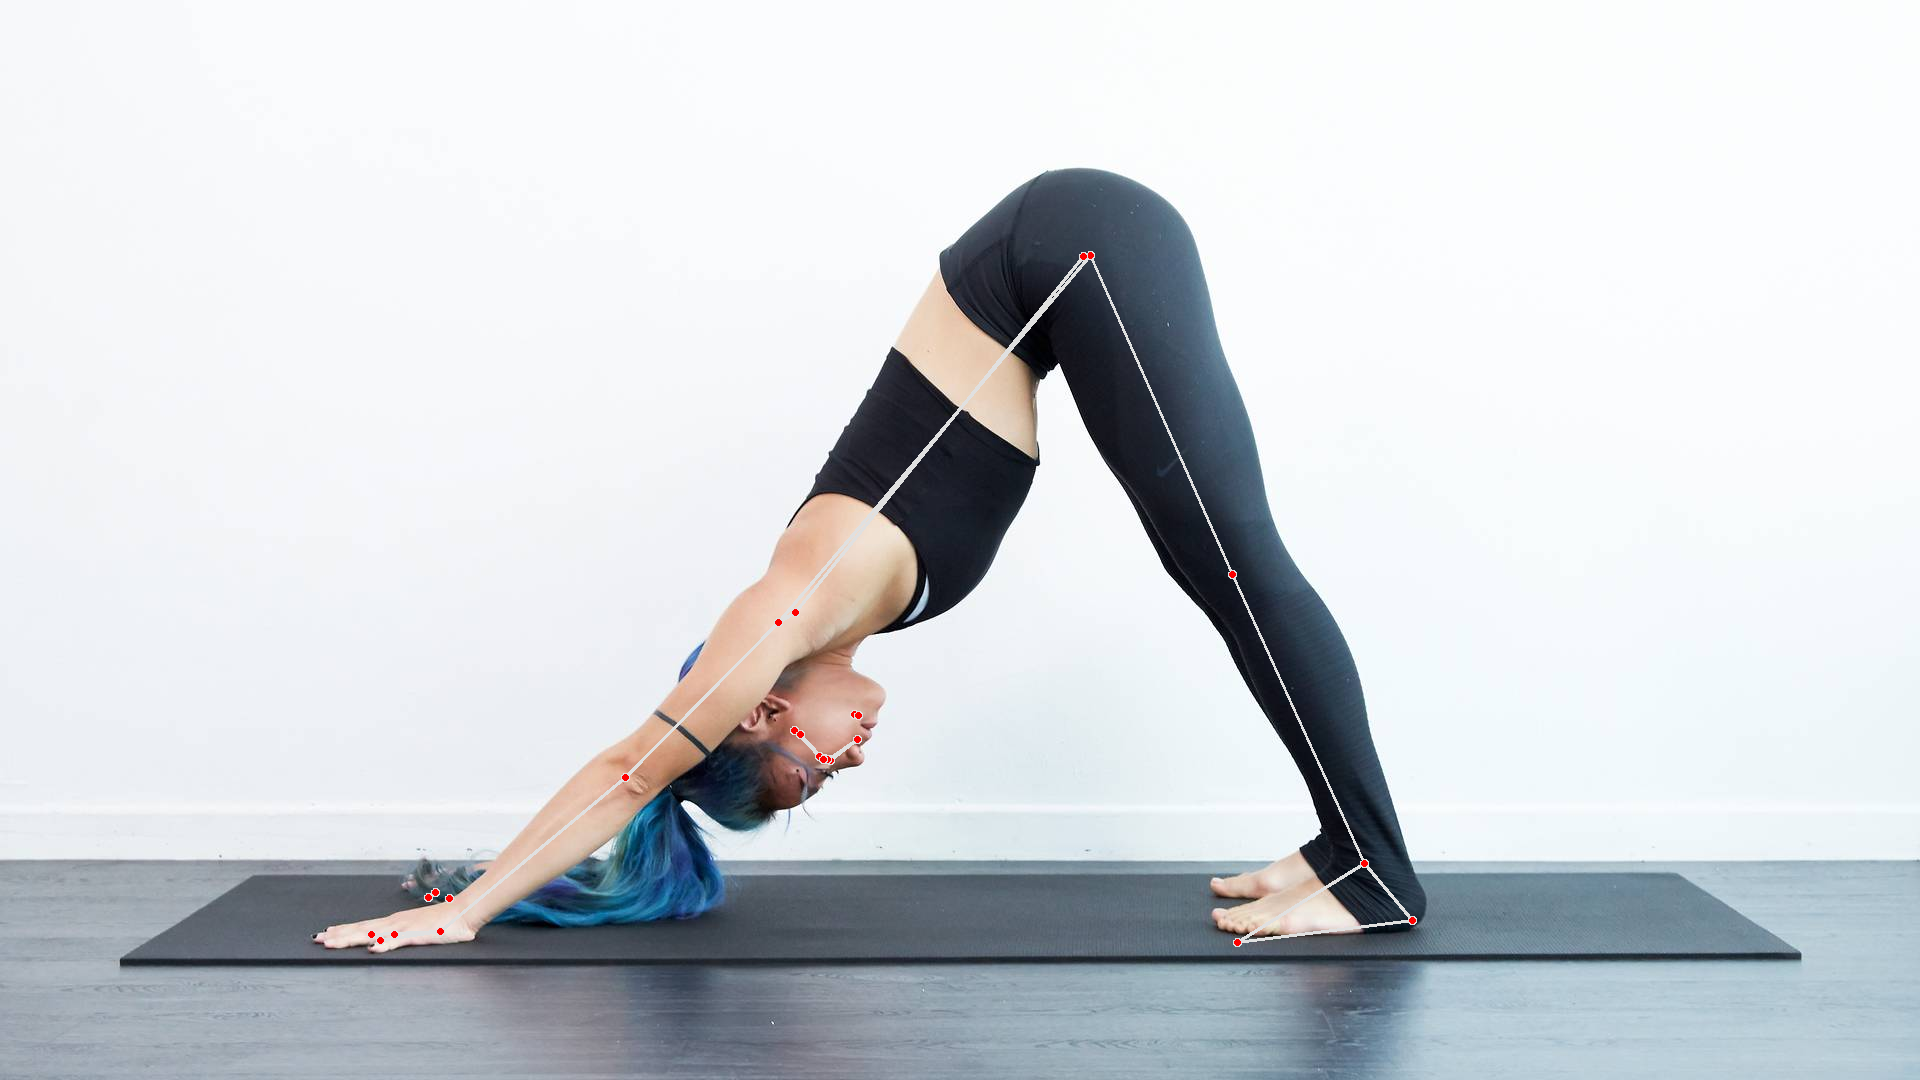

 Correct Pose!


In [85]:
import cv2
import mediapipe as mp
import numpy as np
import os
import joblib
from google.colab.patches import cv2_imshow
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# Initialize Pose Detector
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

def extract_keypoints(image_path):
    """Extracts pose keypoints from an image."""
    if not os.path.exists(image_path):
        print(f"Error: Image not found at {image_path}")
        return None, None

    image = cv2.imread(image_path)
    if image is None:
        print("Error: Failed to load image!")
        return None, None

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.append(landmark.x)
            keypoints.append(landmark.y)

        # Draw pose on image
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        return np.array(keypoints), annotated_image
    else:
        print("Error: Pose not detected in image!")
        return None, None

def load_training_data():
    """Loads simulated training data for pose classification."""
    correct_poses = [np.random.rand(66) for _ in range(5)]
    incorrect_poses = [np.random.rand(66) * np.random.uniform(0.8, 1.3) for _ in range(5)]

    X_train = np.array(correct_poses + incorrect_poses)
    y_train = np.array([1] * 5 + [0] * 5)

    return X_train, y_train

def train_pose_classifier():
    """Trains and saves a pose classification model."""
    X_train, y_train = load_training_data()
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
    joblib.dump(clf, "pose_classifier.pkl")

def load_classifier():
    """Loads the trained pose classification model."""
    if not os.path.exists("pose_classifier.pkl"):
        train_pose_classifier()
    return joblib.load("pose_classifier.pkl")

def predict_pose(user_keypoints):
    """Predicts if the user's pose is correct or incorrect."""
    clf = load_classifier()
    prediction = clf.predict([user_keypoints])[0]
    return prediction  # 1 = Correct, 0 = Incorrect

# Step 1: Ask user to upload an image
print("Please upload an image for pose detection:")
uploaded_file = files.upload()

if uploaded_file:
    # Get the uploaded file name
    user_image_path = list(uploaded_file.keys())[0]

    # Step 2: Process user image and extract keypoints
    user_keypoints, user_pose_image = extract_keypoints(user_image_path)

    if user_keypoints is not None:
        # Step 3: Predict if pose is correct
        is_correct = predict_pose(user_keypoints)

        # Step 4: Display user's pose
        print("User's Pose:")
        cv2_imshow(user_pose_image)

        if is_correct:
            print(" Correct Pose!")
        else:
            print(" Incorrect Pose! Try adjusting your posture.")


Please upload an image for pose detection:


Saving 00000160.jpg to 00000160.jpg
User's Pose:


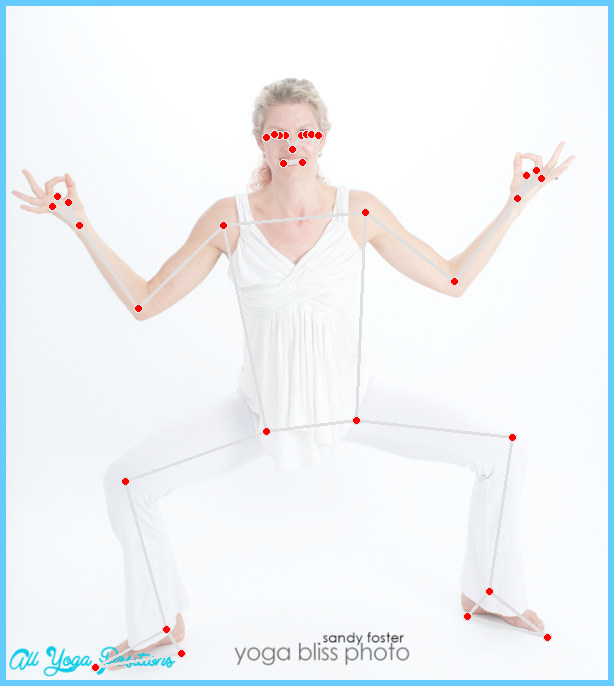

 Incorrect Pose! Try adjusting your posture.


In [89]:
import cv2
import mediapipe as mp
import numpy as np
import os
import joblib
from google.colab.patches import cv2_imshow
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# Initialize Pose Detector
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

def extract_keypoints(image_path):
    """Extracts pose keypoints from an image."""
    if not os.path.exists(image_path):
        print(f"Error: Image not found at {image_path}")
        return None, None

    image = cv2.imread(image_path)
    if image is None:
        print("Error: Failed to load image!")
        return None, None

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.append(landmark.x)
            keypoints.append(landmark.y)

        # Draw pose on image
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        return np.array(keypoints), annotated_image
    else:
        print("Error: Pose not detected in image!")
        return None, None

def load_training_data():
    """Loads simulated training data for pose classification."""
    correct_poses = [np.random.rand(66) for _ in range(5)]
    incorrect_poses = [np.random.rand(66) * np.random.uniform(0.8, 1.3) for _ in range(5)]

    X_train = np.array(correct_poses + incorrect_poses)
    y_train = np.array([1] * 5 + [0] * 5)

    return X_train, y_train

def train_pose_classifier():
    """Trains and saves a pose classification model."""
    X_train, y_train = load_training_data()
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
    joblib.dump(clf, "pose_classifier.pkl")

def load_classifier():
    """Loads the trained pose classification model."""
    if not os.path.exists("pose_classifier.pkl"):
        train_pose_classifier()
    return joblib.load("pose_classifier.pkl")

def predict_pose(user_keypoints):
    """Predicts if the user's pose is correct or incorrect."""
    clf = load_classifier()
    prediction = clf.predict([user_keypoints])[0]
    return prediction  # 1 = Correct, 0 = Incorrect

# Step 1: Ask user to upload an image
print("Please upload an image for pose detection:")
uploaded_file = files.upload()

if uploaded_file:
    # Get the uploaded file name
    user_image_path = list(uploaded_file.keys())[0]

    # Step 2: Process user image and extract keypoints
    user_keypoints, user_pose_image = extract_keypoints(user_image_path)

    if user_keypoints is not None:
        # Step 3: Predict if pose is correct
        is_correct = predict_pose(user_keypoints)

        # Step 4: Display user's pose
        print("User's Pose:")
        cv2_imshow(user_pose_image)

        if is_correct:
            print(" Correct Pose!")
        else:
            print(" Incorrect Pose! Try adjusting your posture.")


**Detecting by voice**


In [ ]:
!pip install sounddevice scipy

In [ ]:
!pip install soundfile pydub SpeechRecognition

In [ ]:
keypoint_cols = [col for col in df.columns if col != 'label']
for col in keypoint_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

keypoint_cols = [col for col in df.columns if col != 'label']


for col in keypoint_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=keypoint_cols)



<IPython.core.display.Javascript object>

Listening for 'I'm ready' (2-minute timeout)...
You said: i am ready
Trigger phrase detected. Capturing image...


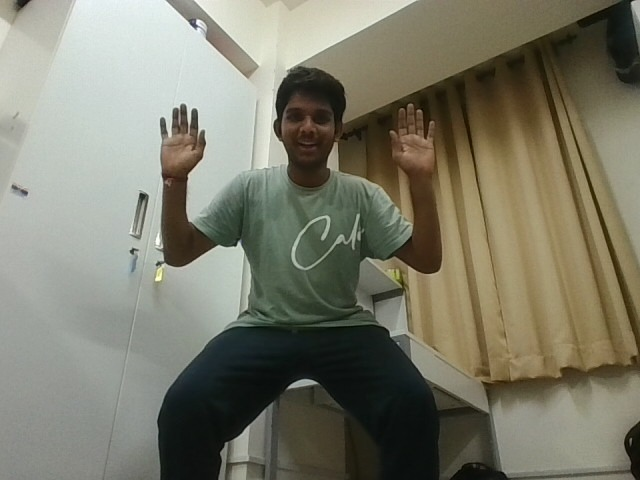

Detected Pose: GODDESS | Accuracy Score: 86.57/100
Feedback based on your pose:
- Turn feet out to 45 degrees.
- Keep torso upright and gaze forward.
- Arms at 90 degrees, palms forward.


<ipython-input-17-40a9f22eb717>:163: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["distance"] = distances


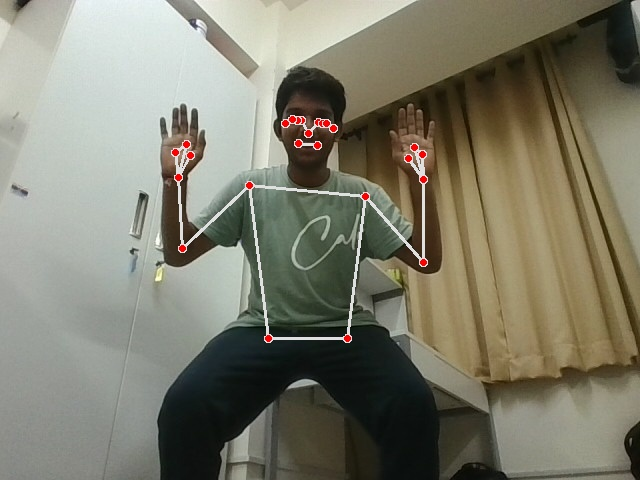

In [ ]:
import base64
import io
import time
import cv2
import numpy as np
import pandas as pd
import mediapipe as mp
from PIL import Image
from IPython.display import Javascript, display, Image as IPImage
from google.colab import output
from pydub import AudioSegment
import speech_recognition as sr

# --- JavaScript to Start Webcam ---
display(Javascript("""
async function startWebcam() {
    const div = document.createElement('div');
    const video = document.createElement('video');
    video.style.width = '500px';
    video.setAttribute('autoplay', '');
    video.setAttribute('playsinline', '');
    const stream = await navigator.mediaDevices.getUserMedia({video: true});
    video.srcObject = stream;
    div.appendChild(video);
    document.body.appendChild(div);

    window.takePhoto = async function() {
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();
        return canvas.toDataURL('image/jpeg');
    }
}
startWebcam();
"""))

# --- JavaScript to Record Audio ---
RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time));
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader();
  reader.onloadend = () => resolve(reader.result);
  reader.readAsDataURL(blob);
});
async function recordAudio() {
  const stream = await navigator.mediaDevices.getUserMedia({ audio: true });
  const mediaRecorder = new MediaRecorder(stream);
  const audioChunks = [];

  mediaRecorder.ondataavailable = event => {
    audioChunks.push(event.data);
  };

  mediaRecorder.start();
  await sleep(6000);
  mediaRecorder.stop();

  await new Promise(resolve => mediaRecorder.onstop = resolve);
  const audioBlob = new Blob(audioChunks);
  const audioBase64 = await b2text(audioBlob);
  stream.getTracks().forEach(track => track.stop());
  return audioBase64;
}
recordAudio();
"""

def record_and_transcribe():
    audio_base64 = output.eval_js(RECORD)
    audio_data = base64.b64decode(audio_base64.split(',')[1])
    with open("user_audio.webm", "wb") as f:
        f.write(audio_data)

    audio = AudioSegment.from_file("user_audio.webm")
    audio = audio.set_frame_rate(16000).set_channels(1)
    audio.export("converted_audio.wav", format="wav")

    recognizer = sr.Recognizer()
    with sr.AudioFile("converted_audio.wav") as source:
        audio_data = recognizer.record(source)
        try:
            return recognizer.recognize_google(audio_data).lower()
        except:
            return ""

POSE_FEEDBACK = {
    "tree": {
        "keywords": ["hip", "knee", "foot", "arm", "shoulder", "balance"],
        "tips": [
            "Place sole of foot on inner thigh or calf, not knee.",
            "Keep hips squared and facing forward.",
            "Engage core muscles to maintain balance.",
            "Bring palms together at chest or overhead.",
            "Relax shoulders away from ears.",
            "Keep standing leg straight but not locked."
        ]
    },
    "downdog": {
        "keywords": ["back", "heel", "arm", "hip", "shoulder", "head"],
        "tips": [
            "Spread fingers wide and press palms firmly.",
            "Straighten arms without locking elbows.",
            "Lift hips high to create an inverted V shape.",
            "Lengthen spine and avoid rounding back.",
            "Reach heels toward the ground.",
            "Keep head between arms in line with spine."
        ]
    },
    "plank": {
        "keywords": ["core", "hip", "shoulder", "arm", "neck", "leg"],
        "tips": [
            "Keep hands under shoulders.",
            "Maintain a straight line from head to heels.",
            "Engage your core to prevent sagging.",
            "Avoid lifting hips too high or letting them drop.",
            "Keep neck neutral, gaze slightly forward.",
            "Tighten leg muscles for stability."
        ]
    },
    "goddess": {
        "keywords": ["knee", "hip", "foot", "arm", "core", "torso"],
        "tips": [
            "Turn feet out to 45 degrees.",
            "Bend knees directly over ankles.",
            "Sink hips low as if sitting on a chair.",
            "Arms at 90 degrees, palms forward.",
            "Engage core to support lower back.",
            "Keep torso upright and gaze forward."
        ]
    },
    "warrior2": {
        "keywords": ["knee", "hip", "shoulder", "arm", "leg", "foot"],
        "tips": [
            "Bend front knee over ankle.",
            "Straighten back leg and ground heel.",
            "Open hips to the side.",
            "Extend arms parallel to the ground.",
            "Keep shoulders over hips.",
            "Engage core for balance and stability."
        ]
    }
}

def select_relevant_tips(pose_name, keypoints):
    selected = []
    if pose_name in POSE_FEEDBACK:
        tips = POSE_FEEDBACK[pose_name]["tips"]
        issues = np.random.choice(len(tips), size=3, replace=False)
        selected = [tips[i] for i in issues]
    return selected

def match_pose(pose_keypoints, csv_path="yoga_keypoints.csv"):
    df = pd.read_csv(csv_path)
    keypoint_cols = [col for col in df.columns if col != 'label']
    for col in keypoint_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    sample_np = np.array(pose_keypoints).reshape(1, -1)
    db_np = df[keypoint_cols].values
    distances = np.linalg.norm(db_np - sample_np, axis=1)
    df["distance"] = distances

    min_distance = df["distance"].min()
    matched_pose = df.loc[df["distance"].idxmin()]["label"]
    return matched_pose, min_distance

# --- Main Execution ---
print("Listening for 'I'm ready' (2-minute timeout)...")
start_time = time.time()
ready_detected = False

for _ in range(20):
    transcript = record_and_transcribe()
    print(f"You said: {transcript}")
    if "i'm ready" in transcript or "im ready" in transcript or "i am ready" in transcript:
        ready_detected = True
        break
    if time.time() - start_time > 120:
        break

if not ready_detected:
    print("Trigger phrase not detected.")
else:
    print("Trigger phrase detected. Capturing image...")
    photo_data = output.eval_js("takePhoto()")
    img_bytes = base64.b64decode(photo_data.split(",")[1])
    img = Image.open(io.BytesIO(img_bytes)).convert("RGB")
    img.save("captured_image.jpg")
    display(img)

    mp_pose = mp.solutions.pose
    mp_drawing = mp.solutions.drawing_utils
    image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    image = cv2.resize(image, (640, 480))

    with mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=False, min_detection_confidence=0.5) as pose:
        result = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        pose_keypoints = []

        if result.pose_landmarks:
            for lm in result.pose_landmarks.landmark:
                pose_keypoints.extend([lm.x, lm.y, lm.z])

            # Draw landmarks
            mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        else:
            print("No person detected in the image.")
            pose_keypoints = []

    if len(pose_keypoints) == 99:
        try:
            matched_pose, distance = match_pose(pose_keypoints)
            score = max(0, 100 - distance * 10)
            print(f"Detected Pose: {matched_pose.upper()} | Accuracy Score: {score:.2f}/100")
            suggestions = select_relevant_tips(matched_pose, pose_keypoints)
            print("Feedback based on your pose:")
            for tip in suggestions:
                print("-", tip)

            display(IPImage(data=cv2.imencode('.jpg', image)[1].tobytes()))

        except Exception as e:
            print("Error during pose evaluation:", str(e))
    else:
        print(f"Expected 99 keypoints, but got {len(pose_keypoints)}.")


<IPython.core.display.Javascript object>

Listening for 'I'm ready' (2-minute timeout)...
You said: 
You said: 
You said: 
You said: i am
You said: 
You said: shuffle i am ready
Trigger phrase detected. Capturing image...


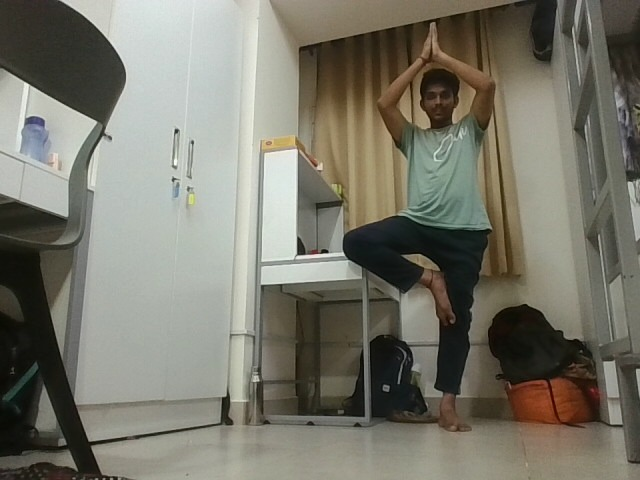

Detected Pose: TREE | Accuracy Score: 89.03/100
Feedback based on your pose:
- Place your foot on your thigh or calf, not on your knee.
- Put your hands together at your chest or raise them above your head.
- Use your belly muscles to help balance.


<ipython-input-52-52c1d36fa6f4>:164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["distance"] = distances


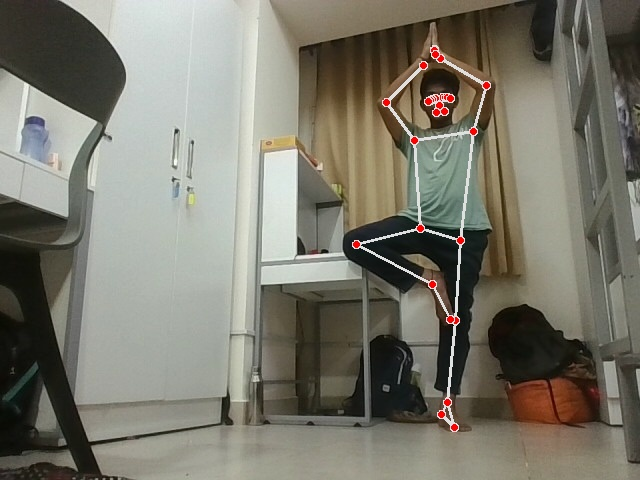

In [ ]:
import base64
import io
import time
import cv2
import numpy as np
import pandas as pd
import mediapipe as mp
from PIL import Image
from IPython.display import Javascript, display, Image as IPImage
from google.colab import output
from pydub import AudioSegment
import speech_recognition as sr

# --- JavaScript to Start Webcam ---
display(Javascript("""
async function startWebcam() {
    const div = document.createElement('div');
    const video = document.createElement('video');
    video.style.width = '500px';
    video.setAttribute('autoplay', '');
    video.setAttribute('playsinline', '');
    const stream = await navigator.mediaDevices.getUserMedia({video: true});
    video.srcObject = stream;
    div.appendChild(video);
    document.body.appendChild(div);

    window.takePhoto = async function() {
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();
        return canvas.toDataURL('image/jpeg');
    }
}
startWebcam();
"""))

# --- JavaScript to Record Audio ---
RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time));
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader();
  reader.onloadend = () => resolve(reader.result);
  reader.readAsDataURL(blob);
});
async function recordAudio() {
  const stream = await navigator.mediaDevices.getUserMedia({ audio: true });
  const mediaRecorder = new MediaRecorder(stream);
  const audioChunks = [];

  mediaRecorder.ondataavailable = event => {
    audioChunks.push(event.data);
  };

  mediaRecorder.start();
  await sleep(6000);
  mediaRecorder.stop();

  await new Promise(resolve => mediaRecorder.onstop = resolve);
  const audioBlob = new Blob(audioChunks);
  const audioBase64 = await b2text(audioBlob);
  stream.getTracks().forEach(track => track.stop());
  return audioBase64;
}
recordAudio();
"""

def record_and_transcribe():
    audio_base64 = output.eval_js(RECORD)
    audio_data = base64.b64decode(audio_base64.split(',')[1])
    with open("user_audio.webm", "wb") as f:
        f.write(audio_data)

    audio = AudioSegment.from_file("user_audio.webm")
    audio = audio.set_frame_rate(16000).set_channels(1)
    audio.export("converted_audio.wav", format="wav")

    recognizer = sr.Recognizer()
    with sr.AudioFile("converted_audio.wav") as source:
        audio_data = recognizer.record(source)
        try:
            return recognizer.recognize_google(audio_data).lower()
        except:
            return ""

POSE_FEEDBACK = {
    "tree": {
        "keywords": ["hip", "knee", "foot", "arm", "shoulder", "balance"],
        "tips": [
            "Place your foot on your thigh or calf, not on your knee.",
            "Face your hips straight forward.",
            "Use your belly muscles to help balance.",
            "Put your hands together at your chest or raise them above your head.",
            "Relax your shoulders and keep your chest open.",
            "Stand tall and don’t lock the knee of your standing leg."
        ]
    },
    "downdog": {
        "keywords": ["back", "heel", "arm", "hip", "shoulder", "head"],
        "tips": [
            "Press your palms into the mat with fingers spread wide.",
            "Keep your arms straight but soft at the elbows.",
            "Push your hips up high to form a V shape.",
            "Try to keep your back flat and long.",
            "Push your heels gently toward the floor.",
            "Let your head hang between your arms."
        ]
    },
    "plank": {
        "keywords": ["core", "hip", "shoulder", "arm", "neck", "leg"],
        "tips": [
            "Keep your shoulders stacked over your hands.",
            "Make your body a straight line from head to toe.",
            "Tighten your belly to avoid sagging.",
            "Don’t lift or drop your hips — keep them in line.",
            "Look slightly ahead to keep your neck in line.",
            "Squeeze your leg muscles to stay firm and stable."
        ]
    },
    "goddess": {
        "keywords": ["knee", "hip", "foot", "arm", "core", "torso"],
        "tips": [
            "Turn your feet outward like a V shape.",
            "Bend your knees over your feet like sitting in a chair.",
            "Drop your hips low and stay strong.",
            "Raise your arms with elbows bent like a goalpost.",
            "Keep your back straight and chest lifted.",
            "Use your belly muscles to stay steady and avoid leaning forward."
        ]
    },
    "warrior2": {
        "keywords": ["knee", "hip", "shoulder", "arm", "leg", "foot"],
        "tips": [
            "Bend your front knee so it stays above your ankle.",
            "Stretch your back leg and press the foot into the floor.",
            "Turn your hips and chest to face the side.",
            "Reach your arms out wide, shoulder-height.",
            "Keep your shoulders relaxed and away from ears.",
            "Tighten your tummy muscles for better control and balance."
        ]
    }
}


def select_relevant_tips(pose_name, keypoints):
    selected = []
    if pose_name in POSE_FEEDBACK:
        tips = POSE_FEEDBACK[pose_name]["tips"]
        issues = np.random.choice(len(tips), size=3, replace=False)
        selected = [tips[i] for i in issues]
    return selected

def match_pose(pose_keypoints, csv_path="yoga_keypoints.csv"):
    df = pd.read_csv(csv_path)
    keypoint_cols = [col for col in df.columns if col != 'label']
    for col in keypoint_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    sample_np = np.array(pose_keypoints).reshape(1, -1)
    db_np = df[keypoint_cols].values
    distances = np.linalg.norm(db_np - sample_np, axis=1)
    df["distance"] = distances

    min_distance = df["distance"].min()
    matched_pose = df.loc[df["distance"].idxmin()]["label"]
    return matched_pose, min_distance

# --- Main Execution ---
print("Listening for 'I'm ready' (2-minute timeout)...")
start_time = time.time()
ready_detected = False

for _ in range(20):
    transcript = record_and_transcribe()
    print(f"You said: {transcript}")
    if "i'm ready" in transcript or "im ready" in transcript or "i am ready" in transcript:
        ready_detected = True
        break
    if time.time() - start_time > 120:
        break

if not ready_detected:
    print("Trigger phrase not detected.")
else:
    print("Trigger phrase detected. Capturing image...")
    photo_data = output.eval_js("takePhoto()")
    img_bytes = base64.b64decode(photo_data.split(",")[1])
    img = Image.open(io.BytesIO(img_bytes)).convert("RGB")
    img.save("captured_image.jpg")
    display(img)

    mp_pose = mp.solutions.pose
    mp_drawing = mp.solutions.drawing_utils
    image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    image = cv2.resize(image, (640, 480))

    with mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=False, min_detection_confidence=0.5) as pose:
        result = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        pose_keypoints = []

        if result.pose_landmarks:
            for lm in result.pose_landmarks.landmark:
                pose_keypoints.extend([lm.x, lm.y, lm.z])

            # Draw landmarks
            mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        else:
            print("No person detected in the image.")
            pose_keypoints = []

    if len(pose_keypoints) == 99:
        try:
            matched_pose, distance = match_pose(pose_keypoints)
            score = max(0, 100 - distance * 10)
            print(f"Detected Pose: {matched_pose.upper()} | Accuracy Score: {score:.2f}/100")
            suggestions = select_relevant_tips(matched_pose, pose_keypoints)
            print("Feedback based on your pose:")
            for tip in suggestions:
                print("-", tip)

            display(IPImage(data=cv2.imencode('.jpg', image)[1].tobytes()))

        except Exception as e:
            print("Error during pose evaluation:", str(e))
    else:
        print(f"Expected 99 keypoints, but got {len(pose_keypoints)}.")


<IPython.core.display.Javascript object>

Listening for 'I'm ready' (2-minute timeout)...
You said: 
You said: i am ready
Trigger phrase detected. Capturing image...


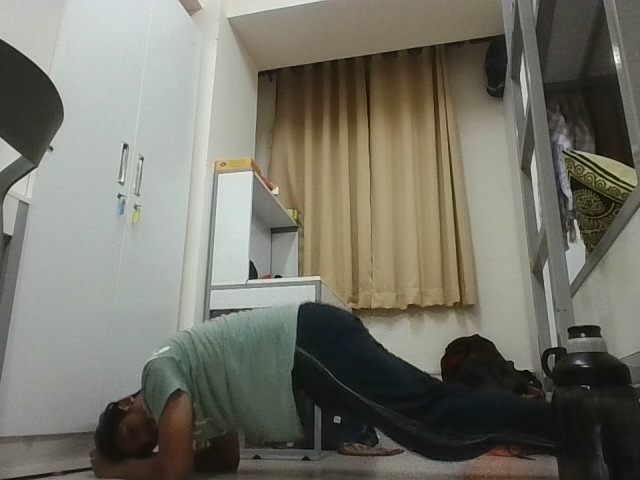

Detected Pose: PLANK | Accuracy Score: 87.76/100
Feedback based on your pose:
- Tighten leg muscles for stability.
- Keep neck neutral, gaze slightly forward.
- Avoid lifting hips too high or letting them drop.


<ipython-input-73-40a9f22eb717>:163: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["distance"] = distances


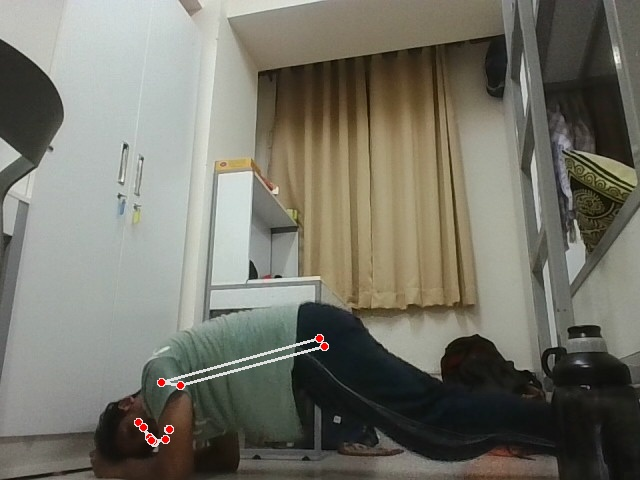

In [ ]:
import base64
import io
import time
import cv2
import numpy as np
import pandas as pd
import mediapipe as mp
from PIL import Image
from IPython.display import Javascript, display, Image as IPImage
from google.colab import output
from pydub import AudioSegment
import speech_recognition as sr

# --- JavaScript to Start Webcam ---
display(Javascript("""
async function startWebcam() {
    const div = document.createElement('div');
    const video = document.createElement('video');
    video.style.width = '500px';
    video.setAttribute('autoplay', '');
    video.setAttribute('playsinline', '');
    const stream = await navigator.mediaDevices.getUserMedia({video: true});
    video.srcObject = stream;
    div.appendChild(video);
    document.body.appendChild(div);

    window.takePhoto = async function() {
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();
        return canvas.toDataURL('image/jpeg');
    }
}
startWebcam();
"""))

# --- JavaScript to Record Audio ---
RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time));
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader();
  reader.onloadend = () => resolve(reader.result);
  reader.readAsDataURL(blob);
});
async function recordAudio() {
  const stream = await navigator.mediaDevices.getUserMedia({ audio: true });
  const mediaRecorder = new MediaRecorder(stream);
  const audioChunks = [];

  mediaRecorder.ondataavailable = event => {
    audioChunks.push(event.data);
  };

  mediaRecorder.start();
  await sleep(6000);
  mediaRecorder.stop();

  await new Promise(resolve => mediaRecorder.onstop = resolve);
  const audioBlob = new Blob(audioChunks);
  const audioBase64 = await b2text(audioBlob);
  stream.getTracks().forEach(track => track.stop());
  return audioBase64;
}
recordAudio();
"""

def record_and_transcribe():
    audio_base64 = output.eval_js(RECORD)
    audio_data = base64.b64decode(audio_base64.split(',')[1])
    with open("user_audio.webm", "wb") as f:
        f.write(audio_data)

    audio = AudioSegment.from_file("user_audio.webm")
    audio = audio.set_frame_rate(16000).set_channels(1)
    audio.export("converted_audio.wav", format="wav")

    recognizer = sr.Recognizer()
    with sr.AudioFile("converted_audio.wav") as source:
        audio_data = recognizer.record(source)
        try:
            return recognizer.recognize_google(audio_data).lower()
        except:
            return ""

POSE_FEEDBACK = {
    "tree": {
        "keywords": ["hip", "knee", "foot", "arm", "shoulder", "balance"],
        "tips": [
            "Place sole of foot on inner thigh or calf, not knee.",
            "Keep hips squared and facing forward.",
            "Engage core muscles to maintain balance.",
            "Bring palms together at chest or overhead.",
            "Relax shoulders away from ears.",
            "Keep standing leg straight but not locked."
        ]
    },
    "downdog": {
        "keywords": ["back", "heel", "arm", "hip", "shoulder", "head"],
        "tips": [
            "Spread fingers wide and press palms firmly.",
            "Straighten arms without locking elbows.",
            "Lift hips high to create an inverted V shape.",
            "Lengthen spine and avoid rounding back.",
            "Reach heels toward the ground.",
            "Keep head between arms in line with spine."
        ]
    },
    "plank": {
        "keywords": ["core", "hip", "shoulder", "arm", "neck", "leg"],
        "tips": [
            "Keep hands under shoulders.",
            "Maintain a straight line from head to heels.",
            "Engage your core to prevent sagging.",
            "Avoid lifting hips too high or letting them drop.",
            "Keep neck neutral, gaze slightly forward.",
            "Tighten leg muscles for stability."
        ]
    },
    "goddess": {
        "keywords": ["knee", "hip", "foot", "arm", "core", "torso"],
        "tips": [
            "Turn feet out to 45 degrees.",
            "Bend knees directly over ankles.",
            "Sink hips low as if sitting on a chair.",
            "Arms at 90 degrees, palms forward.",
            "Engage core to support lower back.",
            "Keep torso upright and gaze forward."
        ]
    },
    "warrior2": {
        "keywords": ["knee", "hip", "shoulder", "arm", "leg", "foot"],
        "tips": [
            "Bend front knee over ankle.",
            "Straighten back leg and ground heel.",
            "Open hips to the side.",
            "Extend arms parallel to the ground.",
            "Keep shoulders over hips.",
            "Engage core for balance and stability."
        ]
    }
}

def select_relevant_tips(pose_name, keypoints):
    selected = []
    if pose_name in POSE_FEEDBACK:
        tips = POSE_FEEDBACK[pose_name]["tips"]
        issues = np.random.choice(len(tips), size=3, replace=False)
        selected = [tips[i] for i in issues]
    return selected

def match_pose(pose_keypoints, csv_path="yoga_keypoints.csv"):
    df = pd.read_csv(csv_path)
    keypoint_cols = [col for col in df.columns if col != 'label']
    for col in keypoint_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    sample_np = np.array(pose_keypoints).reshape(1, -1)
    db_np = df[keypoint_cols].values
    distances = np.linalg.norm(db_np - sample_np, axis=1)
    df["distance"] = distances

    min_distance = df["distance"].min()
    matched_pose = df.loc[df["distance"].idxmin()]["label"]
    return matched_pose, min_distance

# --- Main Execution ---
print("Listening for 'I'm ready' (2-minute timeout)...")
start_time = time.time()
ready_detected = False

for _ in range(20):
    transcript = record_and_transcribe()
    print(f"You said: {transcript}")
    if "i'm ready" in transcript or "im ready" in transcript or "i am ready" in transcript:
        ready_detected = True
        break
    if time.time() - start_time > 120:
        break

if not ready_detected:
    print("Trigger phrase not detected.")
else:
    print("Trigger phrase detected. Capturing image...")
    photo_data = output.eval_js("takePhoto()")
    img_bytes = base64.b64decode(photo_data.split(",")[1])
    img = Image.open(io.BytesIO(img_bytes)).convert("RGB")
    img.save("captured_image.jpg")
    display(img)

    mp_pose = mp.solutions.pose
    mp_drawing = mp.solutions.drawing_utils
    image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    image = cv2.resize(image, (640, 480))

    with mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=False, min_detection_confidence=0.5) as pose:
        result = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        pose_keypoints = []

        if result.pose_landmarks:
            for lm in result.pose_landmarks.landmark:
                pose_keypoints.extend([lm.x, lm.y, lm.z])

            # Draw landmarks
            mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        else:
            print("No person detected in the image.")
            pose_keypoints = []

    if len(pose_keypoints) == 99:
        try:
            matched_pose, distance = match_pose(pose_keypoints)
            score = max(0, 100 - distance * 10)
            print(f"Detected Pose: {matched_pose.upper()} | Accuracy Score: {score:.2f}/100")
            suggestions = select_relevant_tips(matched_pose, pose_keypoints)
            print("Feedback based on your pose:")
            for tip in suggestions:
                print("-", tip)

            display(IPImage(data=cv2.imencode('.jpg', image)[1].tobytes()))

        except Exception as e:
            print("Error during pose evaluation:", str(e))
    else:
        print(f"Expected 99 keypoints, but got {len(pose_keypoints)}.")


<IPython.core.display.Javascript object>

Listening for 'I'm ready' (2-minute timeout)...
You said: 
You said: 
You said: i am ready
Trigger phrase detected. Capturing image...


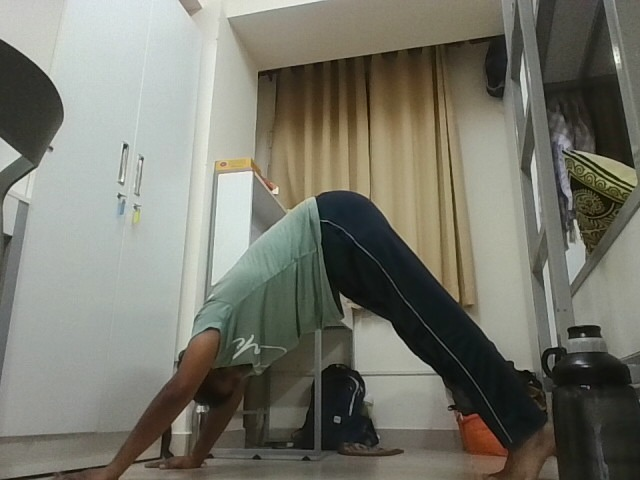

Detected Pose: DOWNDOG | Accuracy Score: 93.28/100
Feedback based on your pose:
- Reach heels toward the ground.
- Lift hips high to create an inverted V shape.
- Straighten arms without locking elbows.


<ipython-input-74-40a9f22eb717>:163: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["distance"] = distances


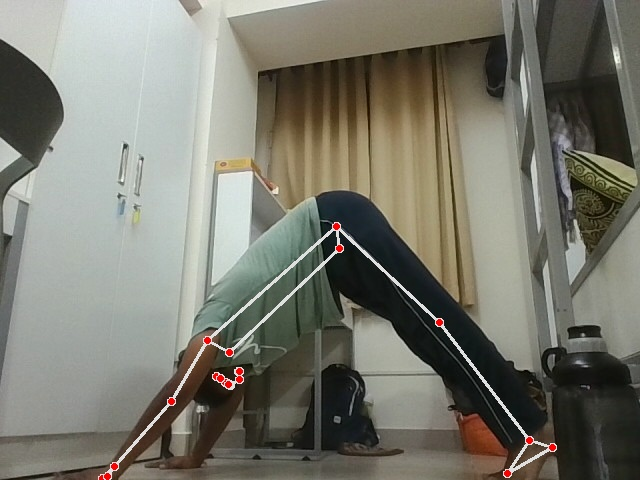

In [ ]:
import base64
import io
import time
import cv2
import numpy as np
import pandas as pd
import mediapipe as mp
from PIL import Image
from IPython.display import Javascript, display, Image as IPImage
from google.colab import output
from pydub import AudioSegment
import speech_recognition as sr

# --- JavaScript to Start Webcam ---
display(Javascript("""
async function startWebcam() {
    const div = document.createElement('div');
    const video = document.createElement('video');
    video.style.width = '500px';
    video.setAttribute('autoplay', '');
    video.setAttribute('playsinline', '');
    const stream = await navigator.mediaDevices.getUserMedia({video: true});
    video.srcObject = stream;
    div.appendChild(video);
    document.body.appendChild(div);

    window.takePhoto = async function() {
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();
        return canvas.toDataURL('image/jpeg');
    }
}
startWebcam();
"""))

# --- JavaScript to Record Audio ---
RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time));
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader();
  reader.onloadend = () => resolve(reader.result);
  reader.readAsDataURL(blob);
});
async function recordAudio() {
  const stream = await navigator.mediaDevices.getUserMedia({ audio: true });
  const mediaRecorder = new MediaRecorder(stream);
  const audioChunks = [];

  mediaRecorder.ondataavailable = event => {
    audioChunks.push(event.data);
  };

  mediaRecorder.start();
  await sleep(6000);
  mediaRecorder.stop();

  await new Promise(resolve => mediaRecorder.onstop = resolve);
  const audioBlob = new Blob(audioChunks);
  const audioBase64 = await b2text(audioBlob);
  stream.getTracks().forEach(track => track.stop());
  return audioBase64;
}
recordAudio();
"""

def record_and_transcribe():
    audio_base64 = output.eval_js(RECORD)
    audio_data = base64.b64decode(audio_base64.split(',')[1])
    with open("user_audio.webm", "wb") as f:
        f.write(audio_data)

    audio = AudioSegment.from_file("user_audio.webm")
    audio = audio.set_frame_rate(16000).set_channels(1)
    audio.export("converted_audio.wav", format="wav")

    recognizer = sr.Recognizer()
    with sr.AudioFile("converted_audio.wav") as source:
        audio_data = recognizer.record(source)
        try:
            return recognizer.recognize_google(audio_data).lower()
        except:
            return ""

POSE_FEEDBACK = {
    "tree": {
        "keywords": ["hip", "knee", "foot", "arm", "shoulder", "balance"],
        "tips": [
            "Place sole of foot on inner thigh or calf, not knee.",
            "Keep hips squared and facing forward.",
            "Engage core muscles to maintain balance.",
            "Bring palms together at chest or overhead.",
            "Relax shoulders away from ears.",
            "Keep standing leg straight but not locked."
        ]
    },
    "downdog": {
        "keywords": ["back", "heel", "arm", "hip", "shoulder", "head"],
        "tips": [
            "Spread fingers wide and press palms firmly.",
            "Straighten arms without locking elbows.",
            "Lift hips high to create an inverted V shape.",
            "Lengthen spine and avoid rounding back.",
            "Reach heels toward the ground.",
            "Keep head between arms in line with spine."
        ]
    },
    "plank": {
        "keywords": ["core", "hip", "shoulder", "arm", "neck", "leg"],
        "tips": [
            "Keep hands under shoulders.",
            "Maintain a straight line from head to heels.",
            "Engage your core to prevent sagging.",
            "Avoid lifting hips too high or letting them drop.",
            "Keep neck neutral, gaze slightly forward.",
            "Tighten leg muscles for stability."
        ]
    },
    "goddess": {
        "keywords": ["knee", "hip", "foot", "arm", "core", "torso"],
        "tips": [
            "Turn feet out to 45 degrees.",
            "Bend knees directly over ankles.",
            "Sink hips low as if sitting on a chair.",
            "Arms at 90 degrees, palms forward.",
            "Engage core to support lower back.",
            "Keep torso upright and gaze forward."
        ]
    },
    "warrior2": {
        "keywords": ["knee", "hip", "shoulder", "arm", "leg", "foot"],
        "tips": [
            "Bend front knee over ankle.",
            "Straighten back leg and ground heel.",
            "Open hips to the side.",
            "Extend arms parallel to the ground.",
            "Keep shoulders over hips.",
            "Engage core for balance and stability."
        ]
    }
}

def select_relevant_tips(pose_name, keypoints):
    selected = []
    if pose_name in POSE_FEEDBACK:
        tips = POSE_FEEDBACK[pose_name]["tips"]
        issues = np.random.choice(len(tips), size=3, replace=False)
        selected = [tips[i] for i in issues]
    return selected

def match_pose(pose_keypoints, csv_path="yoga_keypoints.csv"):
    df = pd.read_csv(csv_path)
    keypoint_cols = [col for col in df.columns if col != 'label']
    for col in keypoint_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    sample_np = np.array(pose_keypoints).reshape(1, -1)
    db_np = df[keypoint_cols].values
    distances = np.linalg.norm(db_np - sample_np, axis=1)
    df["distance"] = distances

    min_distance = df["distance"].min()
    matched_pose = df.loc[df["distance"].idxmin()]["label"]
    return matched_pose, min_distance

# --- Main Execution ---
print("Listening for 'I'm ready' (2-minute timeout)...")
start_time = time.time()
ready_detected = False

for _ in range(20):
    transcript = record_and_transcribe()
    print(f"You said: {transcript}")
    if "i'm ready" in transcript or "im ready" in transcript or "i am ready" in transcript:
        ready_detected = True
        break
    if time.time() - start_time > 120:
        break

if not ready_detected:
    print("Trigger phrase not detected.")
else:
    print("Trigger phrase detected. Capturing image...")
    photo_data = output.eval_js("takePhoto()")
    img_bytes = base64.b64decode(photo_data.split(",")[1])
    img = Image.open(io.BytesIO(img_bytes)).convert("RGB")
    img.save("captured_image.jpg")
    display(img)

    mp_pose = mp.solutions.pose
    mp_drawing = mp.solutions.drawing_utils
    image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    image = cv2.resize(image, (640, 480))

    with mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=False, min_detection_confidence=0.5) as pose:
        result = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        pose_keypoints = []

        if result.pose_landmarks:
            for lm in result.pose_landmarks.landmark:
                pose_keypoints.extend([lm.x, lm.y, lm.z])

            # Draw landmarks
            mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        else:
            print("No person detected in the image.")
            pose_keypoints = []

    if len(pose_keypoints) == 99:
        try:
            matched_pose, distance = match_pose(pose_keypoints)
            score = max(0, 100 - distance * 10)
            print(f"Detected Pose: {matched_pose.upper()} | Accuracy Score: {score:.2f}/100")
            suggestions = select_relevant_tips(matched_pose, pose_keypoints)
            print("Feedback based on your pose:")
            for tip in suggestions:
                print("-", tip)

            display(IPImage(data=cv2.imencode('.jpg', image)[1].tobytes()))

        except Exception as e:
            print("Error during pose evaluation:", str(e))
    else:
        print(f"Expected 99 keypoints, but got {len(pose_keypoints)}.")


<IPython.core.display.Javascript object>

Listening for 'I'm ready' (2-minute timeout)...
You said: 
You said: 
You said: 
You said: i am ready
Trigger phrase detected. Capturing image...


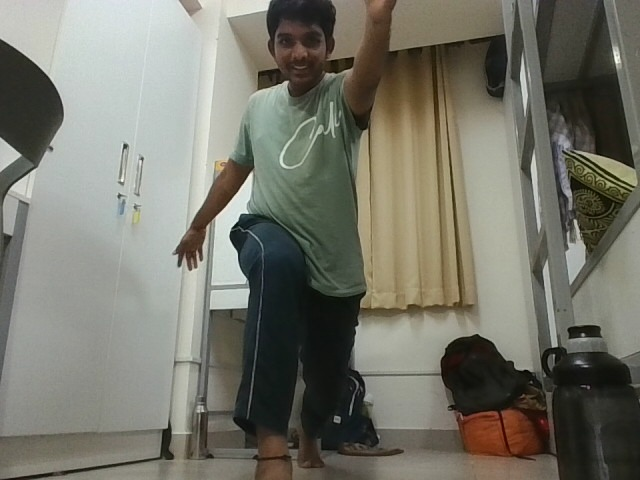

Detected Pose: WARRIOR2 | Accuracy Score: 83.86/100
Feedback based on your pose:
- Engage core for balance and stability.
- Straighten back leg and ground heel.
- Extend arms parallel to the ground.


<ipython-input-78-40a9f22eb717>:163: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["distance"] = distances


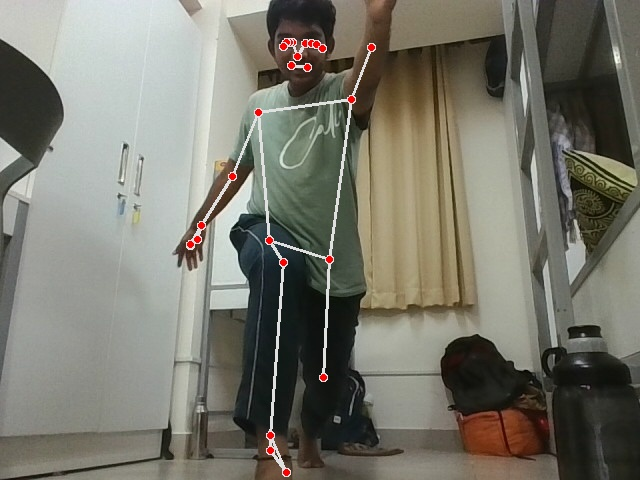

In [ ]:
import base64
import io
import time
import cv2
import numpy as np
import pandas as pd
import mediapipe as mp
from PIL import Image
from IPython.display import Javascript, display, Image as IPImage
from google.colab import output
from pydub import AudioSegment
import speech_recognition as sr

# --- JavaScript to Start Webcam ---
display(Javascript("""
async function startWebcam() {
    const div = document.createElement('div');
    const video = document.createElement('video');
    video.style.width = '500px';
    video.setAttribute('autoplay', '');
    video.setAttribute('playsinline', '');
    const stream = await navigator.mediaDevices.getUserMedia({video: true});
    video.srcObject = stream;
    div.appendChild(video);
    document.body.appendChild(div);

    window.takePhoto = async function() {
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();
        return canvas.toDataURL('image/jpeg');
    }
}
startWebcam();
"""))

# --- JavaScript to Record Audio ---
RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time));
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader();
  reader.onloadend = () => resolve(reader.result);
  reader.readAsDataURL(blob);
});
async function recordAudio() {
  const stream = await navigator.mediaDevices.getUserMedia({ audio: true });
  const mediaRecorder = new MediaRecorder(stream);
  const audioChunks = [];

  mediaRecorder.ondataavailable = event => {
    audioChunks.push(event.data);
  };

  mediaRecorder.start();
  await sleep(6000);
  mediaRecorder.stop();

  await new Promise(resolve => mediaRecorder.onstop = resolve);
  const audioBlob = new Blob(audioChunks);
  const audioBase64 = await b2text(audioBlob);
  stream.getTracks().forEach(track => track.stop());
  return audioBase64;
}
recordAudio();
"""

def record_and_transcribe():
    audio_base64 = output.eval_js(RECORD)
    audio_data = base64.b64decode(audio_base64.split(',')[1])
    with open("user_audio.webm", "wb") as f:
        f.write(audio_data)

    audio = AudioSegment.from_file("user_audio.webm")
    audio = audio.set_frame_rate(16000).set_channels(1)
    audio.export("converted_audio.wav", format="wav")

    recognizer = sr.Recognizer()
    with sr.AudioFile("converted_audio.wav") as source:
        audio_data = recognizer.record(source)
        try:
            return recognizer.recognize_google(audio_data).lower()
        except:
            return ""

POSE_FEEDBACK = {
    "tree": {
        "keywords": ["hip", "knee", "foot", "arm", "shoulder", "balance"],
        "tips": [
            "Place sole of foot on inner thigh or calf, not knee.",
            "Keep hips squared and facing forward.",
            "Engage core muscles to maintain balance.",
            "Bring palms together at chest or overhead.",
            "Relax shoulders away from ears.",
            "Keep standing leg straight but not locked."
        ]
    },
    "downdog": {
        "keywords": ["back", "heel", "arm", "hip", "shoulder", "head"],
        "tips": [
            "Spread fingers wide and press palms firmly.",
            "Straighten arms without locking elbows.",
            "Lift hips high to create an inverted V shape.",
            "Lengthen spine and avoid rounding back.",
            "Reach heels toward the ground.",
            "Keep head between arms in line with spine."
        ]
    },
    "plank": {
        "keywords": ["core", "hip", "shoulder", "arm", "neck", "leg"],
        "tips": [
            "Keep hands under shoulders.",
            "Maintain a straight line from head to heels.",
            "Engage your core to prevent sagging.",
            "Avoid lifting hips too high or letting them drop.",
            "Keep neck neutral, gaze slightly forward.",
            "Tighten leg muscles for stability."
        ]
    },
    "goddess": {
        "keywords": ["knee", "hip", "foot", "arm", "core", "torso"],
        "tips": [
            "Turn feet out to 45 degrees.",
            "Bend knees directly over ankles.",
            "Sink hips low as if sitting on a chair.",
            "Arms at 90 degrees, palms forward.",
            "Engage core to support lower back.",
            "Keep torso upright and gaze forward."
        ]
    },
    "warrior2": {
        "keywords": ["knee", "hip", "shoulder", "arm", "leg", "foot"],
        "tips": [
            "Bend front knee over ankle.",
            "Straighten back leg and ground heel.",
            "Open hips to the side.",
            "Extend arms parallel to the ground.",
            "Keep shoulders over hips.",
            "Engage core for balance and stability."
        ]
    }
}

def select_relevant_tips(pose_name, keypoints):
    selected = []
    if pose_name in POSE_FEEDBACK:
        tips = POSE_FEEDBACK[pose_name]["tips"]
        issues = np.random.choice(len(tips), size=3, replace=False)
        selected = [tips[i] for i in issues]
    return selected

def match_pose(pose_keypoints, csv_path="yoga_keypoints.csv"):
    df = pd.read_csv(csv_path)
    keypoint_cols = [col for col in df.columns if col != 'label']
    for col in keypoint_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    sample_np = np.array(pose_keypoints).reshape(1, -1)
    db_np = df[keypoint_cols].values
    distances = np.linalg.norm(db_np - sample_np, axis=1)
    df["distance"] = distances

    min_distance = df["distance"].min()
    matched_pose = df.loc[df["distance"].idxmin()]["label"]
    return matched_pose, min_distance

# --- Main Execution ---
print("Listening for 'I'm ready' (2-minute timeout)...")
start_time = time.time()
ready_detected = False

for _ in range(20):
    transcript = record_and_transcribe()
    print(f"You said: {transcript}")
    if "i'm ready" in transcript or "im ready" in transcript or "i am ready" in transcript:
        ready_detected = True
        break
    if time.time() - start_time > 120:
        break

if not ready_detected:
    print("Trigger phrase not detected.")
else:
    print("Trigger phrase detected. Capturing image...")
    photo_data = output.eval_js("takePhoto()")
    img_bytes = base64.b64decode(photo_data.split(",")[1])
    img = Image.open(io.BytesIO(img_bytes)).convert("RGB")
    img.save("captured_image.jpg")
    display(img)

    mp_pose = mp.solutions.pose
    mp_drawing = mp.solutions.drawing_utils
    image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    image = cv2.resize(image, (640, 480))

    with mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=False, min_detection_confidence=0.5) as pose:
        result = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        pose_keypoints = []

        if result.pose_landmarks:
            for lm in result.pose_landmarks.landmark:
                pose_keypoints.extend([lm.x, lm.y, lm.z])

            # Draw landmarks
            mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        else:
            print("No person detected in the image.")
            pose_keypoints = []

    if len(pose_keypoints) == 99:
        try:
            matched_pose, distance = match_pose(pose_keypoints)
            score = max(0, 100 - distance * 10)
            print(f"Detected Pose: {matched_pose.upper()} | Accuracy Score: {score:.2f}/100")
            suggestions = select_relevant_tips(matched_pose, pose_keypoints)
            print("Feedback based on your pose:")
            for tip in suggestions:
                print("-", tip)

            display(IPImage(data=cv2.imencode('.jpg', image)[1].tobytes()))

        except Exception as e:
            print("Error during pose evaluation:", str(e))
    else:
        print(f"Expected 99 keypoints, but got {len(pose_keypoints)}.")
